# Lezione 2

## 1) Integrale Monte Carlo 1D

Sia $I= \int _0 ^1 \frac{\pi}{2}\cos(\pi x/2)dx = 1$. E'stata ottenuta una stima di $I$ con il metodo Monte Carlo eseguendo due diversi campionamenti dell'intervallo $[0,1]$.

### Campionamento uniforme

Nel primo caso è stato fatto un campionamento uniforme di $[0,1]$ e sono stati calcolati $M=10^5$ valori dell'integranda sui punti campionati. Di seguito è mostrato l'andamento della stima di $I$ con il numero di campionamenti.  


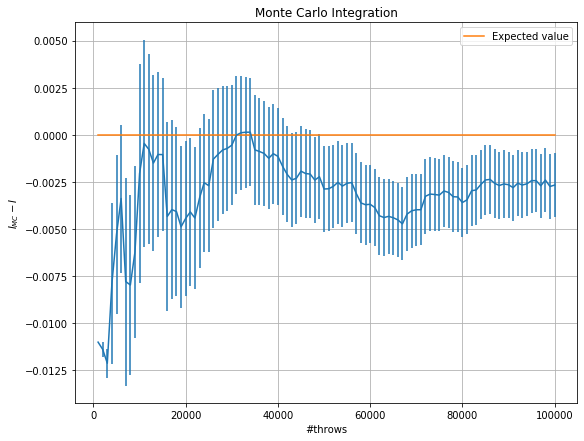

0.00170316


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#plot uniform

Nthrows, mean, error = np.loadtxt("MonteCarlo1D/data1.dat", usecols=(0,1,2), unpack=True)

plt.figure(figsize=(9,7))
plt.errorbar(Nthrows ,mean-1, yerr=error)
plt.plot(Nthrows, np.zeros(len(Nthrows)), label='Expected value')
plt.legend()
plt.xlabel('#throws')
plt.ylabel('$I_{MC} - I$')
plt.grid(True)
plt.title('Monte Carlo Integration')
plt.show()
a=np.array([1,2,34,3,25,4,13])

print(error[-1])

La stima finale di $I$ è  $I_{MC}=0.99732 \pm 0.00170$. Il valore atteso non rientra nelle barre d'errore della stima. 

### Importance Sampling

Nel secondo caso sfruttiamo l'importance sampling in modo da ottenere una stima di $I$ con una minore incertezza. 
Consideriamo lo sviluppo di Taylor dell'integranda al secondo ordine $d(x) = \frac{\pi}{2}\bigl( 1 - \frac{\pi ^1 x^2}{8}\bigr)$ e generiamo un campione di una variabile aleatoria in $[0,1]$ con distribuzione proporzionale a $d(x)$ utilizzando il metodo Accept-Reject.
La nuova integranda $f(x)$ è data dal rapporto tra la vecchia integranda e la funzione $d(x)$ normalizzata:
$$
f(x)=(24-\pi ^2)\frac{\pi}{2}\cos(\pi x/2)/\bigl( 24 - \frac{\pi ^2 x^2}{3} \bigr).
$$
Procedendo come nel caso precedente nel calcolo dell'integrale Monte Carlo otteniamo il seguente andamento:

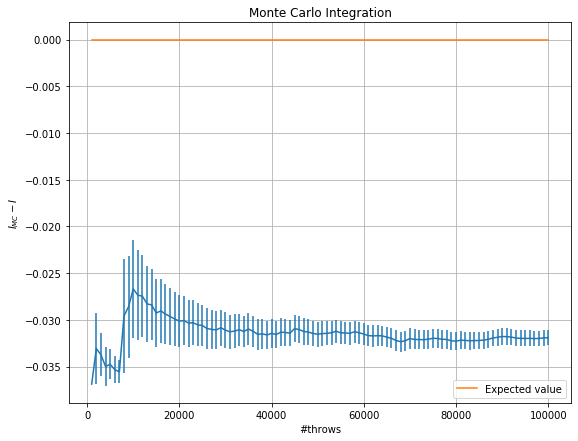

0.000814334


In [29]:
#plot importance sampling 1

Nthrows, mean, error = np.loadtxt("MonteCarlo1D/data2.dat", usecols=(0,1,2),unpack=True)

plt.figure(figsize=(9,7))
plt.errorbar(Nthrows ,mean-1, yerr=error)
plt.plot(Nthrows, np.zeros(len(Nthrows)), label='Expected value')
plt.legend()
plt.xlabel('#throws')
plt.ylabel('$I_{MC} - I$')
plt.grid(True)
plt.title('Monte Carlo Integration')
plt.show()

print(error[-1])


Abbiamo quindi la stima $I_{MC}=0.968087 \pm 0.000814$. Grazie all'importance sampling abbiamo eseguito una calcolo più preciso ma abbiamo trovato una stima meno accurata. 


Ho aggiunto un secondo tentativo con l'importance sampling campionando una gaussiana in $[0,+\infty)$ (riscalata di 2 per ottenere una distribuzione su $[0,+\infty)$) scegliendo $\mu = 0$ e $\sigma = 0.35$ in modo che il suo profilo somigliasse quanto più possibile a quello dell'integranda. Il campione di tale distrubuzione è stato ottenuto compionando una gaussiana su $\mathbb{R}$ e accettando $x$ se positivo e $-x$ se $x$ è negativo. 

Dal momento che gli $x$ del campione appartengono a $[0,+\infty)$, per calcolare l'integrale su $[0,1]$ considero l'integranda
$$
f(x) = \begin{cases} \frac{\pi}{2}\cos(\pi x/2) & x \in [0,1]\\
0 & x > 1\end{cases}
$$
Di seguito è mostrato l'andamento della stima $I_{MC}$ con il numero di campionamenti.

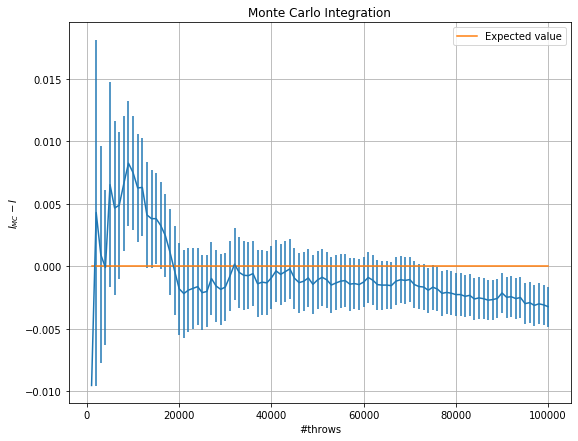

0.00161026


In [30]:
#plot importance sampling 2

Nthrows, mean, error = np.loadtxt("MonteCarlo1D/data3.dat", usecols=(0,1,2),unpack=True)

plt.figure(figsize=(9,7))
plt.errorbar(Nthrows ,mean-1, yerr=error)
plt.plot(Nthrows, np.zeros(len(Nthrows)), label='Expected value')
plt.legend()
plt.xlabel('#throws')
plt.ylabel('$I_{MC} - I$')
plt.grid(True)
plt.title('Monte Carlo Integration')
plt.show()

print(error[-1])

Troviamo  $I_{MC}=0.996756 \pm 0.001610$,
risultato simile a quello del sampling uniforme sia in termini di precisione che di accuratezza.

## 2) Random Walks

In questo secondo esercizio è stato simulato un random walk 3D su un reticolo cubico e nel continuo.
In entrambi i casi sono state generate $10^4$ traiettorie che partono dall'origine, per 100 time steps, con passo di ogni step di lunghezza 1.
Nelle figure seguenti, per i due casi, è rappresentata la traittoria 1 del campione di traiettorie.

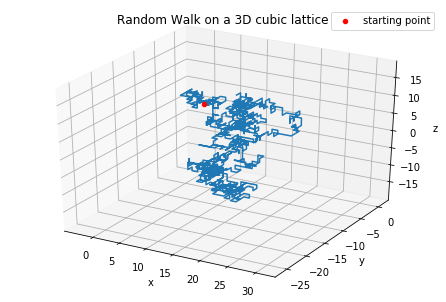

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

x,y,z = np.loadtxt("RandomWalks/lattice1000.dat", usecols=(0,1,2), unpack=True)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x,y,z)
ax.scatter(x[0],y[0],z[0], label='starting point',color='r')
plt.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Random Walk on a 3D cubic lattice')
plt.show()

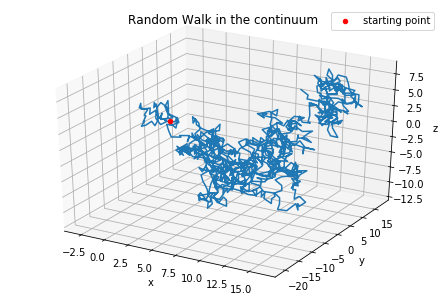

In [17]:
x,y,z = np.loadtxt("RandomWalks/continuum1000.dat", usecols=(0,1,2), unpack=True)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x,y,z)
ax.scatter(x[0],y[0],z[0],color='r', label='starting point')
plt.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Random Walk in the continuum')
plt.show()



Di seguito è mostrato, per i due casi, l'andamento di $\sqrt{< |r_{t}|^2>}$, con la relativa incertezza, e il fit ottenuto usando una funzione $k\sqrt{t}$.

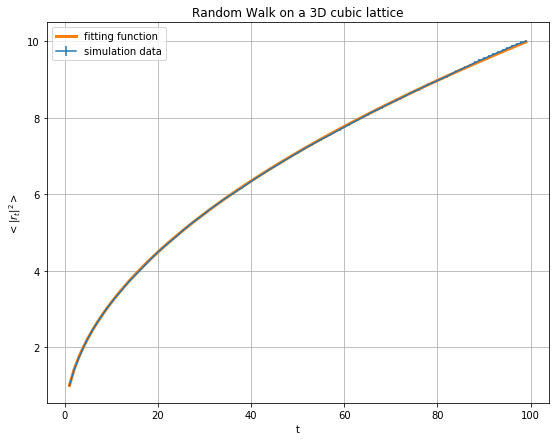

Lattice: 1.003957 +/- 0.000187


In [43]:
def f(x,k):
   return k*np.sqrt(x)



t, r2, sigma = np.loadtxt("RandomWalks/diffusion.dat", usecols=(0,1,2), unpack=True)

r2 = np.sqrt(r2)
sig = np.array( [sigma[i]/(2*r2[i]) for i in np.arange(len(t))] ) #errors propagation

plt.figure(figsize=(9,7))

plt.errorbar(t,r2,yerr=sig, label='simulation data')
p_opt, p_cov = curve_fit(f, t, r2)
y_fit = f(t,p_opt[0])
plt.plot(t,y_fit, label = 'fitting function', linewidth=3)
plt.title('Random Walk on a 3D cubic lattice')
plt.xlabel('t')
plt.ylabel('$<|r_t|^2>$')
plt.legend()
plt.grid(True)
plt.show()

k=round(p_opt[0],6)
sigmak=round(np.sqrt(p_cov[0][0]),6)
print("Lattice: "+str(k)+" +/- "+str(sigmak))


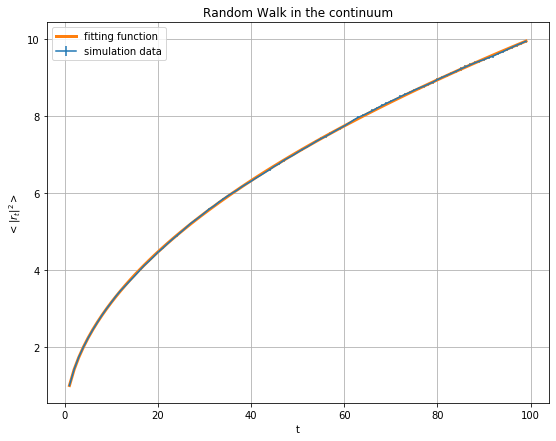

Continuum: 0.99972 +/- 0.000178


In [44]:
t, r2, sigma = np.loadtxt("RandomWalks/diffusion.dat", usecols=(0,3,4), unpack=True)

r2 = np.sqrt(r2)
sig = np.array( [sigma[i]/(2*r2[i]) for i in np.arange(len(t))] ) #errors propagation

plt.figure(figsize=(9,7))

plt.errorbar(t,r2,yerr=sig, label='simulation data')
p_opt, p_cov = curve_fit(f, t, r2)
y_fit = f(t,p_opt[0])
plt.plot(t,y_fit, label = 'fitting function', linewidth=3)
plt.title('Random Walk in the continuum')
plt.xlabel('t')
plt.ylabel('$<|r_t|^2>$')
plt.grid(True)
plt.legend()
plt.show()

k=round(p_opt[0],6)
sigmak=round(np.sqrt(p_cov[0][0]),6)
print("Continuum: "+str(k)+" +/- "+str(sigmak))



Per il random walk su reticolo il risultato del fit è $k= 1.003957\pm 0.000187$
mentre per il random walk nel continuo $k= 0.99972\pm0.00018$. I valori di $k$ stimati col fit non sono compatibili con il valore atteso nel caso di un processo diffusivo $k_{\text{diff}}=\sqrt{2D}=\sqrt{2\cdot a^2/(2\tau)}=1$ per $a=1$ e $\tau = 1$. Tuttavia la grande vicinanza al valore atteso suggerisce che i processi simulati siano con buona approssimazione processi diffusivi.